In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import json
%matplotlib inline

In [19]:
df_trial = pd.read_csv('low-high-april-4.csv', sep = ",")
df_trial.head(10)

,Event Index,UTC Timestamp,UTC Date,Local Timestamp,Local Timezone,Local Date,Experiment ID,Experiment Version,Tree Node Key,Repeat Key,...,order,environment,round_instance,task,function id,rod fixing checked,builtin_rt,end_time,start_time,index
0,1,1554300485564.000,03/04/2019 14:08:05,1554300485475.000,1.000,03/04/2019 15:08:05,6138.000,35.000,task-5e3j,nan,...,low-high,low,nan,NaN,instruction,nan,45037.475,1554300485473.000,1554300440434.000,0.000
1,2,1554300487959.000,03/04/2019 14:08:07,1554300487666.000,1.000,03/04/2019 15:08:07,6138.000,35.000,task-5e3j,nan,...,low-high,low,nan,NaN,instruction,nan,2187.065,1554300487665.000,1554300485478.000,0.000
2,3,1554300490813.000,03/04/2019 14:08:10,1554300490786.000,1.000,03/04/2019 15:08:10,6138.000,35.000,task-5e3j,nan,...,low-high,low,nan,NaN,instruction,nan,3118.175,1554300490786.000,1554300487667.000,0.000
3,4,1554300491563.000,03/04/2019 14:08:11,1554300491486.000,1.000,03/04/2019 15:08:11,6138.000,35.000,task-5e3j,nan,...,low-high,low,nan,NaN,instruction,nan,697.525,1554300491485.000,1554300490787.000,0.000
4,5,1554300491641.000,03/04/2019 14:08:11,1554300491488.000,1.000,03/04/2019 15:08:11,6138.000,35.000,task-5e3j,nan,...,low-high,low,11.000,NaN,caller,nan,nan,nan,nan,1.000
5,6,1554300491641.000,03/04/2019 14:08:11,1554300491490.000,1.000,03/04/2019 15:08:11,6138.000,35.000,task-5e3j,nan,...,low-high,low,11.000,NaN,caller,nan,nan,nan,nan,1.000
6,7,1554300491641.000,03/04/2019 14:08:11,1554300491492.000,1.000,03/04/2019 15:08:11,6138.000,35.000,task-5e3j,nan,...,low-high,low,11.000,NaN,caller,nan,nan,nan,nan,1.000
7,8,1554300491641.000,03/04/2019 14:08:11,1554300491493.000,1.000,03/04/2019 15:08:11,6138.000,35.000,task-5e3j,nan,...,low-high,low,11.000,NaN,caller,nan,nan,nan,nan,1.000
8,9,1554300492843.000,03/04/2019 14:08:12,1554300492818.000,1.000,03/04/2019 15:08:12,6138.000,35.000,task-5e3j,nan,...,low-high,low,11.000,fishing,fishing_l,nan,1220.420,1554300492714.000,1554300491493.000,1.000
9,10,1554300493032.000,03/04/2019 14:08:13,1554300492967.000,1.000,03/04/2019 15:08:12,6138.000,35.000,task-5e3j,nan,...,low-high,low,11.000,fishing,fishing_l,nan,46.250,1554300492866.000,1554300492819.000,1.000


In [20]:
#get rid of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#replace all null and nan to the np.nan
df_trial = df_trial.replace('null', np.nan)
df_trial = df_trial.replace('nan', np.nan)


#turn object into floats and round them and rename them
df_trial['end_time'] = df_trial['end_time'].astype(float)
df_trial['start_time'] = round(df_trial['start_time'].astype(float))
df_trial['builtin_rt'] = df_trial['builtin_rt'].astype(float) #dont round up builtin reaction time
df_trial['quality_check'] = df_trial['rod fixing checked'].astype(float)
df_trial['id'] = df_trial['Participant Private ID']
df_trial['function_id'] = df_trial['function id']
df_trial['round_instance'] = df_trial['round_instance']
df_trial['trial_index'] = df_trial['index']


In [21]:
data = df_trial[['trial_index', 'id','price_displayed', 'key pressed','environment', 'order', 
           'round_instance', 'task', 'function_id', 'quality_check', 
           'builtin_rt', 'end_time', 'start_time']]

In [22]:
data_useful = data[(data.function_id == "rod_fixing")|(data.function_id == "fishing_l")|(data.function_id == "fishing_h")]


In [26]:
data_useful.head(4000)

,trial_index,id,price_displayed,key pressed,environment,order,round_instance,task,function_id,quality_check,builtin_rt,end_time,start_time
8,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,1220.420,1554300492714.000,1554300491493.000
9,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,46.250,1554300492866.000,1554300492819.000
10,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,41.285,1554300493011.000,1554300492969.000
11,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,171.165,1554300493288.000,1554300493116.000
12,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,38.000,1554300493432.000,1554300493393.000
13,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,67.235,1554300493605.000,1554300493537.000
14,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,56.380,1554300493765.000,1554300493708.000
15,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,60.995,1554300493934.000,1554300493873.000
16,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,56.810,1554300494094.000,1554300494037.000
17,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,122.370,1554300494323.000,1554300494200.000


In [24]:
data_useful = data_useful.sort_values(by = ['id', 'start_time'])

In [45]:
d = data_useful.groupby(['id', 'price_displayed'])['start_time'].diff().shift(-1).reset_index(name = 'latency')
d = d.set_index('index')

In [46]:
data_useful['latency'] = d['latency']
data_useful= data_useful.sort_index().sort_values(['id', 'start_time'])

In [47]:
1554300558737.000 - 1554300558561.000

176.0

In [50]:
1554300573631.000 - 1554300573149.000	

482.0

In [62]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', None)
data_useful.head(10000)

,trial_index,id,price_displayed,key pressed,environment,order,round_instance,task,function_id,quality_check,builtin_rt,end_time,start_time,latency
8,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,1220.420,1554300492714.000,1554300491493.000,1326.000
9,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,46.250,1554300492866.000,1554300492819.000,150.000
10,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,41.285,1554300493011.000,1554300492969.000,147.000
11,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,171.165,1554300493288.000,1554300493116.000,277.000
12,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,38.000,1554300493432.000,1554300493393.000,144.000
13,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,67.235,1554300493605.000,1554300493537.000,171.000
14,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,56.380,1554300493765.000,1554300493708.000,165.000
15,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,60.995,1554300493934.000,1554300493873.000,164.000
16,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,56.810,1554300494094.000,1554300494037.000,163.000
17,1.000,665035.000,1.800,40.000,low,low-high,11.000,fishing,fishing_l,nan,122.370,1554300494323.000,1554300494200.000,227.000


In [ ]:
data_fish = data[(data.function_id == 'fishing_h')|(data.function_id == 'fishing_l')]

In [54]:
#low environment
data_fish_l = data_useful[data_useful.function_id == 'fishing_l']
low_price = data_fish_l['price_displayed']
low_tap = np.arange(1, len(data_fish_l['price_displayed'])+1)
low_latency = data_fish_l['latency']

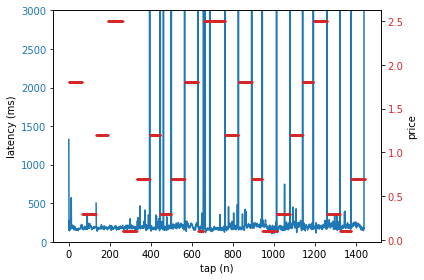

In [55]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tap (n)')
ax1.set_ylabel('latency (ms)')
ax1.plot(low_tap, low_latency, color=color)
ax1.set_ylim([0,3000])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('price')  # we already handled the x-label with ax1
ax2.scatter(low_tap, low_price, color=color, s = 1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [56]:
#high environment
data_fish_h = data_useful[data_useful.function_id == 'fishing_h']
high_price = data_fish_h['price_displayed']
high_tap = np.arange(1, len(data_fish_h['price_displayed'])+1)
high_latency = data_fish_h['latency']

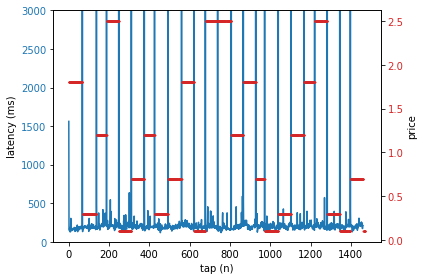

In [57]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tap (n)')
ax1.set_ylabel('latency (ms)')
ax1.plot(high_tap, high_latency, color=color)
ax1.set_ylim([0,3000])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('price')  # we already handled the x-label with ax1
ax2.scatter(high_tap, high_price, color=color, s = 1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [58]:
#rod
data_rod = data_useful[data_useful.function_id == 'rod_fixing']
rod_price = data_rod['price_displayed']
rod_tap = np.arange(1, len(data_rod['price_displayed'])+1)
rod_latency = data_rod['latency']

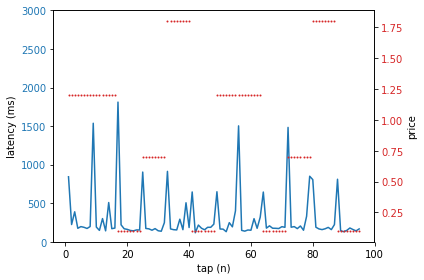

In [61]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tap (n)')
ax1.set_ylabel('latency (ms)')
ax1.plot(rod_tap, rod_latency, color=color)
ax1.set_ylim([0,3000])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('price')  # we already handled the x-label with ax1
ax2.scatter(rod_tap, rod_price, color=color, s = 1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [63]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', None)
data_rod.head(1000)

,trial_index,id,price_displayed,key pressed,environment,order,round_instance,task,function_id,quality_check,builtin_rt,end_time,start_time,latency
149,2.000,665035.000,1.200,39.000,low,low-high,11.000,rod_fixing,rod_fixing,1.000,840.490,1554300518472.000,1554300517630.000,843.000
150,2.000,665035.000,1.200,39.000,low,low-high,11.000,rod_fixing,rod_fixing,1.000,221.490,1554300518695.000,1554300518473.000,224.000
151,2.000,665035.000,1.200,39.000,low,low-high,11.000,rod_fixing,rod_fixing,1.000,385.300,1554300519083.000,1554300518697.000,389.000
152,2.000,665035.000,1.200,39.000,low,low-high,11.000,rod_fixing,rod_fixing,1.000,172.860,1554300519259.000,1554300519086.000,175.000
153,2.000,665035.000,1.200,39.000,low,low-high,11.000,rod_fixing,rod_fixing,1.000,195.215,1554300519456.000,1554300519261.000,197.000
154,2.000,665035.000,1.200,39.000,low,low-high,11.000,rod_fixing,rod_fixing,1.000,185.675,1554300519644.000,1554300519458.000,188.000
155,2.000,665035.000,1.200,39.000,low,low-high,11.000,rod_fixing,rod_fixing,1.000,170.625,1554300519817.000,1554300519646.000,173.000
156,2.000,665035.000,1.200,39.000,low,low-high,11.000,rod_fixing,rod_fixing,1.000,191.040,1554300520010.000,1554300519819.000,198.000
444,6.000,665035.000,1.200,39.000,low,low-high,11.000,rod_fixing,rod_fixing,1.000,1534.375,1554300571508.000,1554300569973.000,1537.000
445,6.000,665035.000,1.200,39.000,low,low-high,11.000,rod_fixing,rod_fixing,1.000,188.615,1554300571699.000,1554300571510.000,191.000


Things to check at the end of every 20 batch:
1. age 
2. group wise plot
3. questionnares
4. impulsivity and apathy

rod fixing instruction - explicity say rod will break randomly 
powerpoint of a task - mood and punishment
parkinson on impulsivity and apathy but look for those in healthy populations